In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
### Supervised ###### 
sup = pd.read_csv('/.../.../.../Result3_R1 All_Dataset_Results.csv')
unsup = pd.read_csv('/.../.../.../embedding_quality_evaluation.csv')

In [4]:
sup.head()

,Dataset,Feature_Set,Accuracy,F1_Score,AUROC,AUPRC,Sensitivity,Specificity
0,demo_coding_vs_intergenomic_seqs,DB2,0.90392,0.907537,0.970698,0.965869,0.94304,0.86480
1,demo_coding_vs_intergenomic_seqs,HD,0.84732,0.859291,0.940909,0.929279,0.93240,0.76224
2,demo_coding_vs_intergenomic_seqs,mistral,0.86884,0.876269,0.953685,0.945818,0.92888,0.80880
3,demo_coding_vs_intergenomic_seqs,NT,0.86904,0.875702,0.950481,0.948412,0.92264,0.81544
4,demo_coding_vs_intergenomic_seqs,GENALM,0.93188,0.932536,0.981178,0.980875,0.94160,0.92216


In [5]:
unsup.head()

,Dataset,Model,RankMe,NESum,StableRank,PCA_Var_1,PCA_Var_2
0,demo_coding_vs_intergenomic_seqs,DNA_BERT2,419.495148,3.668379,1.271610,0.272606,0.102624
1,demo_coding_vs_intergenomic_seqs,HyenaDNA,19.328695,2.179398,1.016496,0.458850,0.127657
2,demo_coding_vs_intergenomic_seqs,genalm,608.974609,4.652702,1.539069,0.214933,0.138904
3,demo_coding_vs_intergenomic_seqs,grover,368.302460,4.937262,1.584341,0.202545,0.129690
4,demo_coding_vs_intergenomic_seqs,mistral,90.246552,2.739331,1.102305,0.365060,0.219968


In [6]:
# Mapping short names to full model names
model_name_map = {
    'DB2': 'DNA_BERT2',
    'HD': 'HyenaDNA',
    'mistral': 'mistral',
    'NT': 'nucleotide-transformer-500m-human-ref',  # or adjust if you're using NT-2.5b etc.
    'GENALM': 'genalm',
    'GROVER': 'grover',
    'CombinedFeatures': 'CombinedFeatures',
    'CharTokenizer': 'CharTokenizer'
}

# Apply the mapping
sup['Model'] = sup['Feature_Set'].map(model_name_map)

# Merge on Dataset and Model
merged_df = pd.merge(sup, unsup, on=['Dataset', 'Model'])

In [7]:
merged_df.shape

(24, 14)

In [8]:
merged_df.head()

,Dataset,Feature_Set,Accuracy,F1_Score,AUROC,AUPRC,Sensitivity,Specificity,Model,RankMe,NESum,StableRank,PCA_Var_1,PCA_Var_2
0,demo_coding_vs_intergenomic_seqs,DB2,0.90392,0.907537,0.970698,0.965869,0.94304,0.86480,DNA_BERT2,419.495148,3.668379,1.271610,0.272606,0.102624
1,demo_coding_vs_intergenomic_seqs,HD,0.84732,0.859291,0.940909,0.929279,0.93240,0.76224,HyenaDNA,19.328695,2.179398,1.016496,0.458850,0.127657
2,demo_coding_vs_intergenomic_seqs,mistral,0.86884,0.876269,0.953685,0.945818,0.92888,0.80880,mistral,90.246552,2.739331,1.102305,0.365060,0.219968
3,demo_coding_vs_intergenomic_seqs,NT,0.86904,0.875702,0.950481,0.948412,0.92264,0.81544,nucleotide-transformer-500m-human-ref,527.946805,5.358238,1.106825,0.186629,0.080154
4,demo_coding_vs_intergenomic_seqs,GENALM,0.93188,0.932536,0.981178,0.980875,0.94160,0.92216,genalm,608.974609,4.652702,1.539069,0.214933,0.138904


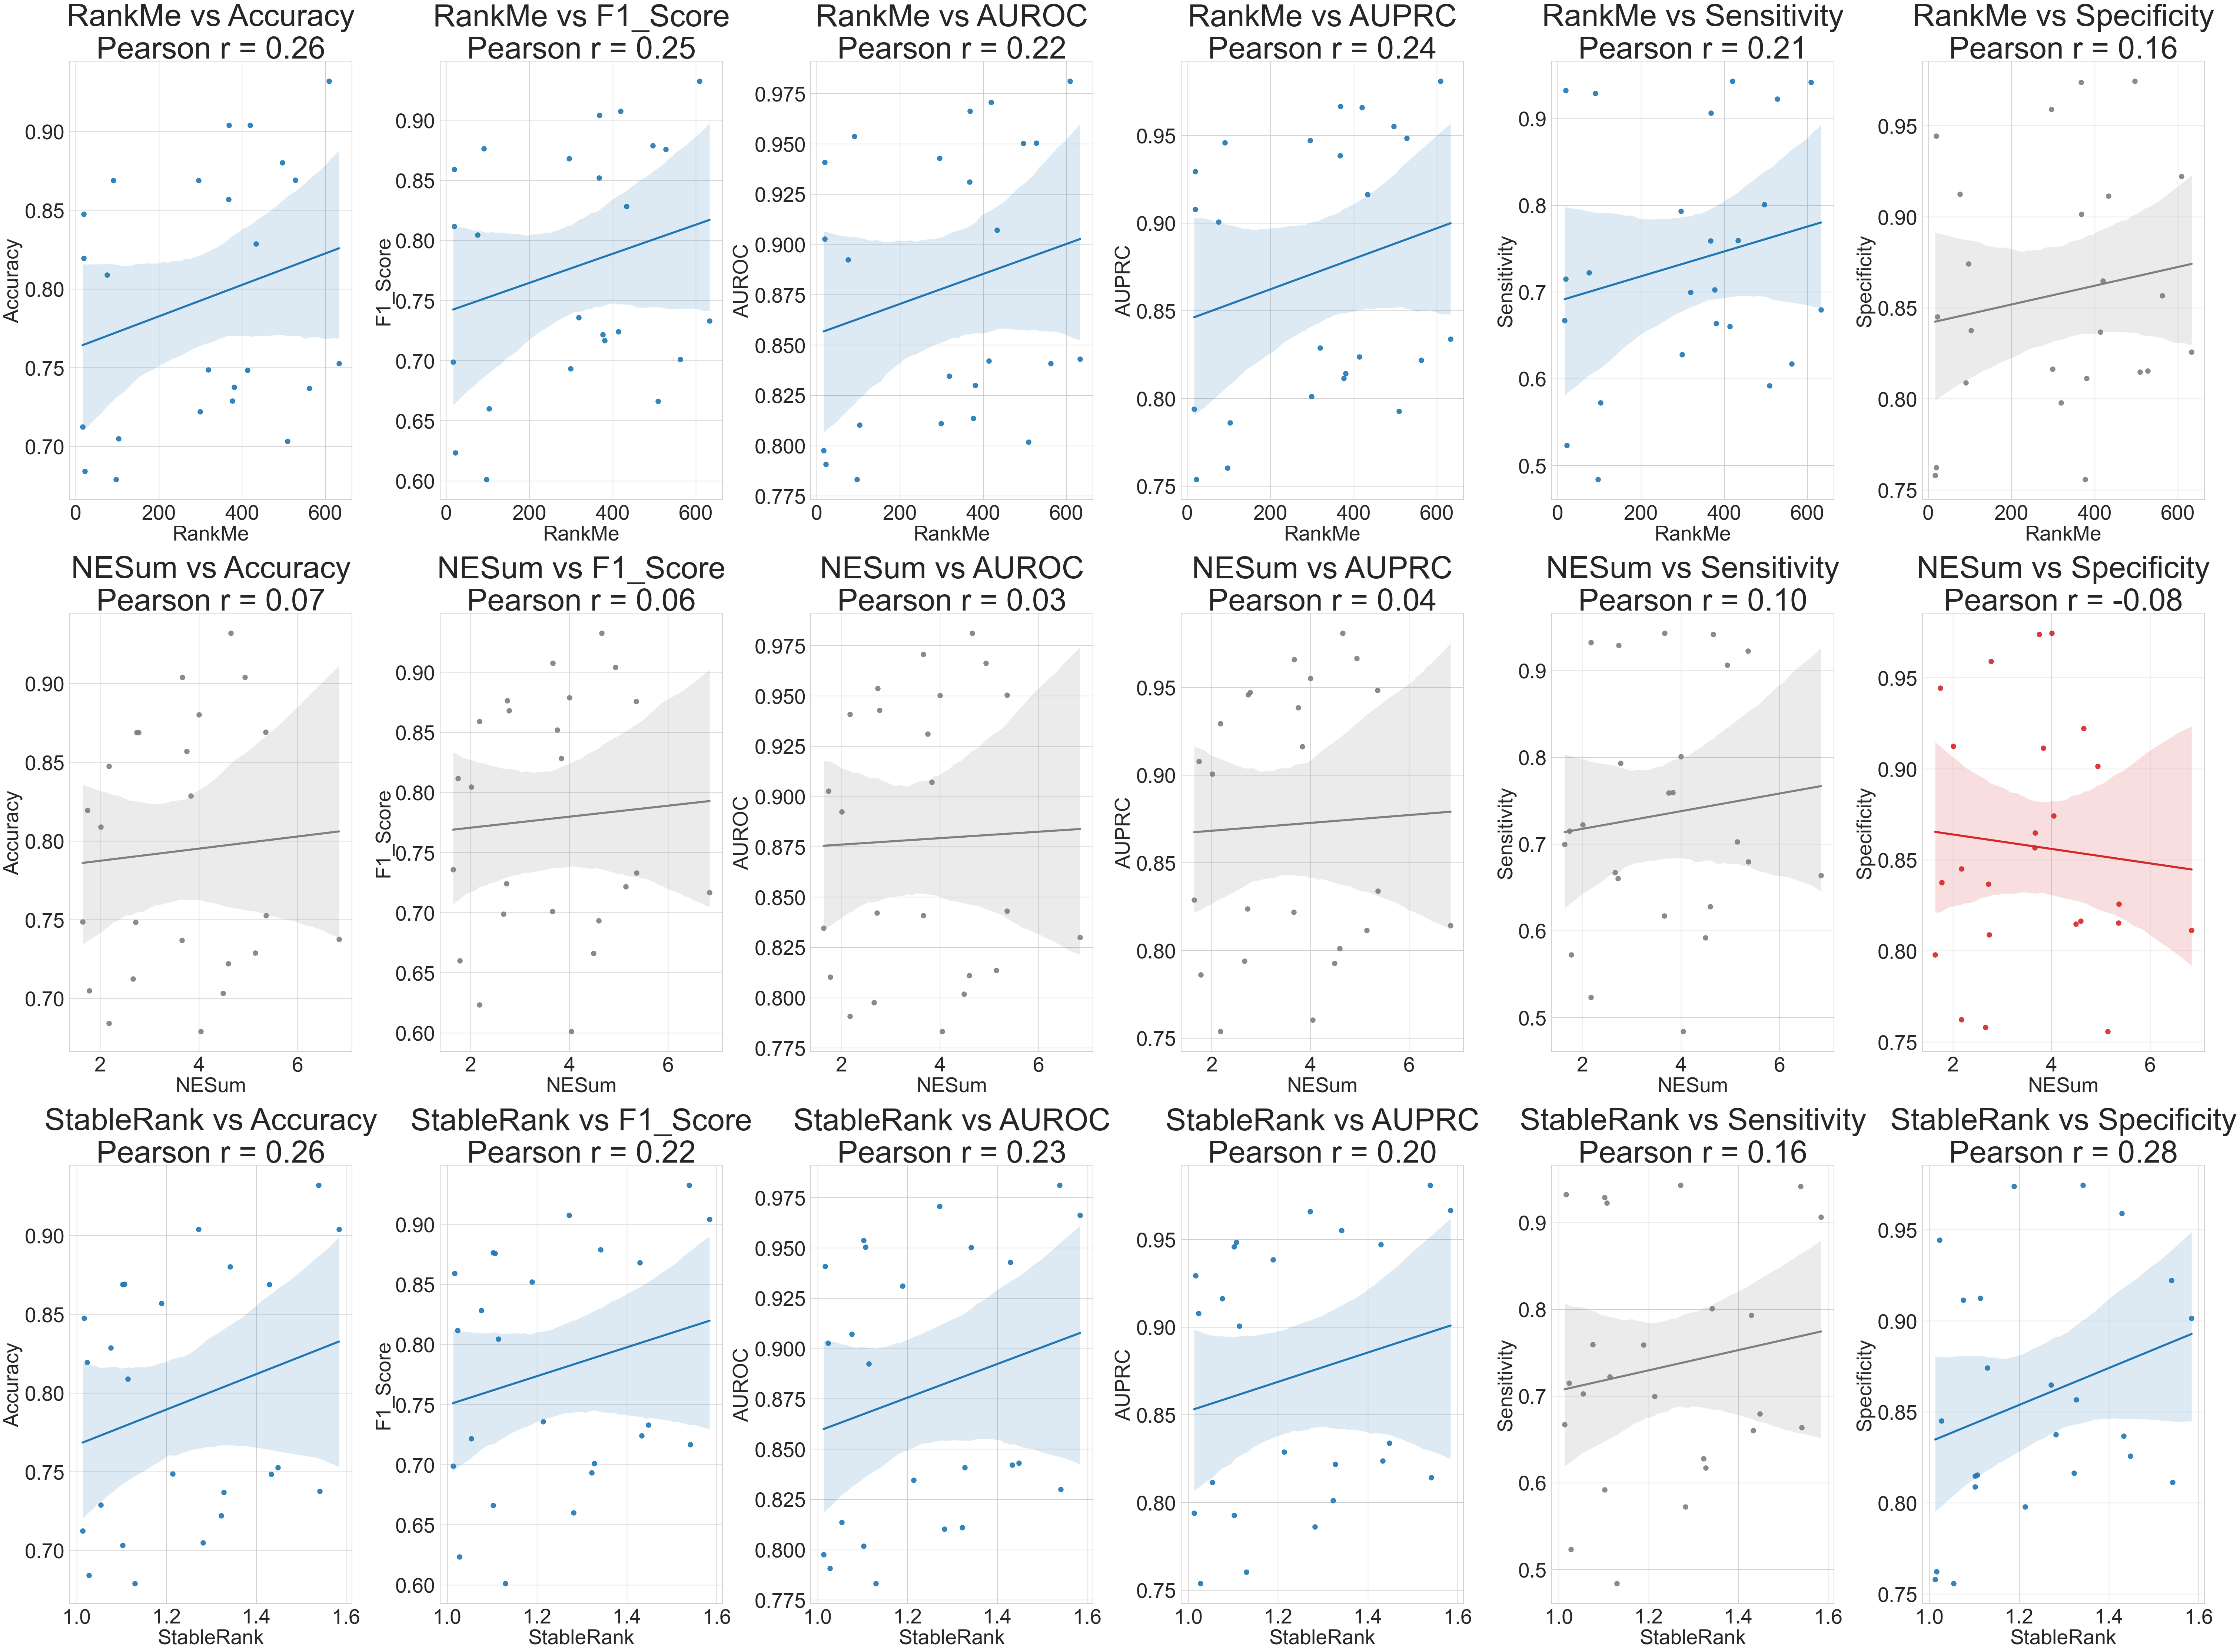

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import pandas as pd
import matplotlib

# Set global style to use Merriweather font
matplotlib.rcParams['font.family'] = 'Merriweather'
sns.set(style='whitegrid')

# Define metrics
unsupervised_metrics = ['RankMe', 'NESum', 'StableRank']
supervised_metrics = ['Accuracy', 'F1_Score', 'AUROC', 'AUPRC', 'Sensitivity', 'Specificity']

# List to store correlations
correlation_list = []

# Font settings
plt.rcParams.update({
    'font.size': 20,
    'axes.labelsize': 22,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
})

plt.figure(figsize=(60,45))
plot_number = 1

# Custom color palette
high_corr_color = '#1f77b4'     # Blue
mid_corr_color = '#7f7f7f'      # Gray
neg_corr_color = '#d62728'      # Red

for unsup_metric in unsupervised_metrics:
    for sup_metric in supervised_metrics:
        plt.subplot(len(unsupervised_metrics), len(supervised_metrics), plot_number)

        # Calculate Pearson correlation
        corr, _ = pearsonr(merged_df[unsup_metric], merged_df[sup_metric])
        correlation_list.append((unsup_metric, sup_metric, corr))

        # Choose color based on correlation strength
        if corr > 0.20:
            color = high_corr_color
        elif corr < 0:
            color = neg_corr_color
        else:
            color = mid_corr_color

        # Plot with the chosen color
        sns.regplot(
            x=unsup_metric,
            y=sup_metric,
            data=merged_df,
            scatter_kws={'s': 90, 'color': color, 'alpha': 0.9},
            line_kws={'color': color, 'linewidth': 4}
        )

        # Regular weight title with Merriweather
        plt.title(f'{unsup_metric} vs {sup_metric}\nPearson r = {corr:.2f}', fontsize=60)
        plt.xlabel(unsup_metric, fontsize=40)
        plt.ylabel(sup_metric, fontsize=40)
        plt.tick_params(axis='both', labelsize=40)
        plot_number += 1

plt.tight_layout()
plt.savefig('/.../.../.../unsup_sup_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

# Create DataFrame with results
correlation_df = pd.DataFrame(correlation_list, columns=['Unsupervised_Metric', 'Supervised_Metric', 'Pearson_r'])
